In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.value_counts("furnishingstatus")

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
dtype: int64

In [5]:
df = df.iloc[5:]
df = df.reset_index(drop=True)

In [6]:
d = {"yes":0, "no":1}
e = {"semi-furnished":0 ,"unfurnished":1, "furnished":2}
df["furnishingstatus"] = df["furnishingstatus"].map(e)
df["mainroad"] = df["mainroad"].map(d)
df["guestroom"] = df["guestroom"].map(d)
df["basement"] = df["basement"].map(d)
df["hotwaterheating"] = df["hotwaterheating"].map(d)
df["airconditioning"] = df["airconditioning"].map(d)
df["prefarea"] = df["prefarea"].map(d)

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,10850000,7500,3,3,1,0,1,0,1,0,2,0,0
1,10150000,8580,4,3,4,0,1,1,1,0,2,0,0
2,10150000,16200,5,3,2,0,1,1,1,1,0,1,1
3,9870000,8100,4,1,2,0,0,0,1,0,2,0,2
4,9800000,5750,3,2,4,0,0,1,1,0,1,0,1


In [8]:
df = pd.get_dummies(df,columns=["furnishingstatus"])

In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_0,furnishingstatus_1,furnishingstatus_2
0,10850000,7500,3,3,1,0,1,0,1,0,2,0,1,0,0
1,10150000,8580,4,3,4,0,1,1,1,0,2,0,1,0,0
2,10150000,16200,5,3,2,0,1,1,1,1,0,1,0,1,0
3,9870000,8100,4,1,2,0,0,0,1,0,2,0,0,0,1
4,9800000,5750,3,2,4,0,0,1,1,0,1,0,0,1,0


In [10]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=19)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)

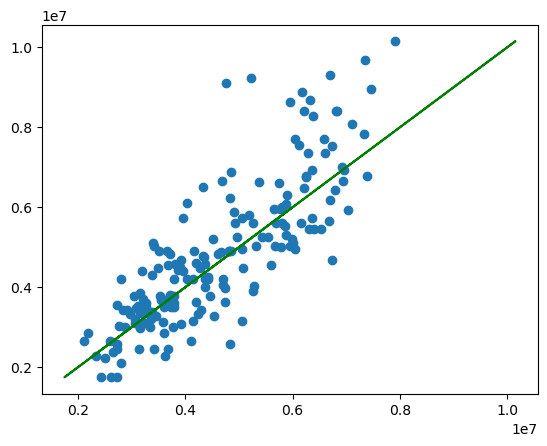

In [20]:
plt.plot(y_test,y_test,"g")
plt.scatter(y_pred,y_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_absolute_error(y_test,y_pred)

775702.8503338057

In [23]:
import statsmodels.api as sm

In [34]:
veri = df.iloc[:,1:15]

In [35]:
veri.shape

(540, 14)

In [36]:
X = np.append(arr=np.ones((540,1)).astype(int), values=veri, axis=1)

In [37]:
X

array([[    1,  7500,     3, ...,     1,     0,     0],
       [    1,  8580,     4, ...,     1,     0,     0],
       [    1, 16200,     5, ...,     0,     1,     0],
       ...,
       [    1,  3620,     2, ...,     0,     1,     0],
       [    1,  2910,     3, ...,     0,     0,     1],
       [    1,  3850,     3, ...,     0,     1,     0]], dtype=int64)

In [44]:
X_l = veri.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [45]:
X_l = np.array(X_l, dtype=float)

In [46]:
model = sm.OLS(y,X_l).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     87.46
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.20e-122
Time:                        21:33:19   Log-Likelihood:                -8211.8
No. Observations:                 540   AIC:                         1.645e+04
Df Residuals:                     526   BIC:                         1.651e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           234.5949     22.503     10.425      0.000     190.389     278.801
x2          9.725e+04   6.73e+04      1.445      0.149    -3.5e+04    2.29e+05
x3          9.316e+05   9.79e+04      9.513      0.000    7.39e+05    1.12e+06
x4          4.391e+05   5.93e+04      7.400      0.000    3.23e+05    5.56e+05
x5         -4.561e+05   1.31e+05     -3.472      0.001   -7.14e+05   -1.98e+05
x6         -3.502e+05   1.22e+05     -2.859      0.004   -5.91e+05    -1.1e+05
x7         -3.113e+05   1.02e+05     -3.044      0.002   -5.12e+05    -1.1e+05
x8         -9.136e+05   2.06e+05     -4.432      0.000   -1.32e+06   -5.09e+05
x9         -8.446e+05      1e+05     -8.413      0.000   -1.04e+06   -6.47e+05
x10         2.126e+05   5.46e+04      3.895      0.000    1.05e+05     3.2e+05
x11         -5.93e+05   1.08e+05     -5.507      0.000   -8.05e+05   -3.81e+05
x12         3.679e+06   3.59e+05     10.250      0.000    2.97e+06    4.38e+06
x13         3.304e+06    3.6e+05      9.190      0.000     2.6e+06    4.01e+06
x14         3.652e+06   3.62e+05     10.090      0.000    2.94e+06    4.36e+06
==============================================================================
Omnibus:                       44.906   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.508
Skew:                           0.577   Prob(JB):                     2.97e-16
Kurtosis:                       4.358   Cond. No.                     8.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_l = veri.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].values

In [49]:
X_l = np.array(X_l, dtype=float)

In [50]:
model = sm.OLS(y,X_l).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     94.38
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          9.05e-123
Time:                        21:34:10   Log-Likelihood:                -8212.9
No. Observations:                 540   AIC:                         1.645e+04
Df Residuals:                     527   BIC:                         1.651e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           237.2671     22.450     10.569      0.000     193.165     281.369
x2          9.642e+05   9.54e+04     10.106      0.000    7.77e+05    1.15e+06
x3          4.693e+05   5.56e+04      8.446      0.000     3.6e+05    5.79e+05
x4         -4.329e+05   1.31e+05     -3.317      0.001   -6.89e+05   -1.76e+05
x5         -3.452e+05   1.23e+05     -2.817      0.005   -5.86e+05   -1.04e+05
x6         -3.313e+05   1.01e+05     -3.267      0.001   -5.31e+05   -1.32e+05
x7         -9.185e+05   2.06e+05     -4.451      0.000   -1.32e+06   -5.13e+05
x8         -8.422e+05      1e+05     -8.381      0.000   -1.04e+06   -6.45e+05
x9          2.179e+05   5.45e+04      3.997      0.000    1.11e+05    3.25e+05
x10        -5.964e+05   1.08e+05     -5.533      0.000   -8.08e+05   -3.85e+05
x11         3.868e+06   3.35e+05     11.560      0.000    3.21e+06    4.53e+06
x12         3.485e+06   3.37e+05     10.332      0.000    2.82e+06    4.15e+06
x13         3.838e+06   3.39e+05     11.335      0.000    3.17e+06     4.5e+06
==============================================================================
Omnibus:                       48.277   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.129
Skew:                           0.602   Prob(JB):                     6.57e-18
Kurtosis:                       4.438   Cond. No.                     7.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
y = df["price"].values
x = df.drop(columns=["price","bedrooms"], axis=1).values

In [60]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=19)

In [68]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [69]:
lr.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred = lr.predict(x_test)

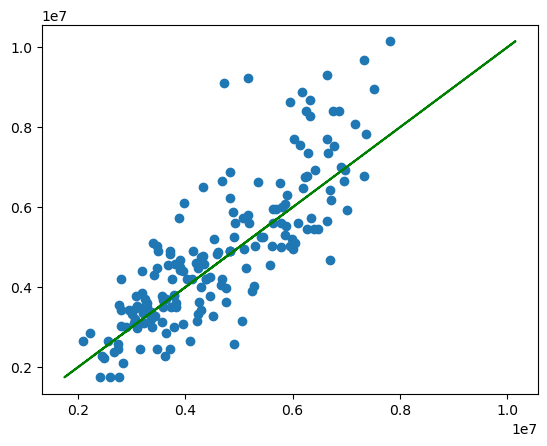

In [71]:
plt.plot(y_test,y_test,"g")
plt.scatter(y_pred,y_test)

In [72]:
mean_absolute_error(y_test,y_pred)

775734.4584707328

In [73]:
veri = df.iloc[:,[1,2,3,4,5,6,8,9,10,11]]

In [74]:
veri.shape

(540, 10)

In [75]:
X = np.append(arr=np.ones((540,1)).astype(int), values=veri, axis=1)

In [76]:
veri

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
0,7500,3,3,1,0,1,1,0,2,0
1,8580,4,3,4,0,1,1,0,2,0
2,16200,5,3,2,0,1,1,1,0,1
3,8100,4,1,2,0,0,1,0,2,0
4,5750,3,2,4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
535,3000,2,1,1,0,1,1,1,2,1
536,2400,3,1,1,1,1,1,1,0,1
537,3620,2,1,1,0,1,1,1,0,1
538,2910,3,1,1,1,1,1,1,0,1


In [77]:
X_l = veri.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

In [78]:
X_l = np.array(X_l, dtype=float)

In [79]:
model = sm.OLS(y,X_l).fit()

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1082.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                        0.00
Time:                        21:36:25   Log-Likelihood:                         -8269.0
No. Observations:                 540   AIC:                                  1.656e+04
Df Residuals:                     530   BIC:                                  1.660e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           304.0801     23.438     12.974      0.000     258.037     350.123
x2          3.803e+05   6.87e+04      5.533      0.000    2.45e+05    5.15e+05
x3           1.17e+06   1.06e+05     11.073      0.000    9.63e+05    1.38e+06
x4          4.618e+05   6.26e+04      7.375      0.000    3.39e+05    5.85e+05
x5         -4.319e+05   1.45e+05     -2.988      0.003   -7.16e+05   -1.48e+05
x6         -1.997e+05   1.22e+05     -1.633      0.103    -4.4e+05    4.06e+04
x7          3.408e+05   1.74e+05      1.955      0.051   -1591.354    6.83e+05
x8         -4.933e+05   1.02e+05     -4.819      0.000   -6.94e+05   -2.92e+05
x9          2.521e+05   6.01e+04      4.192      0.000    1.34e+05     3.7e+05
x10        -3.791e+05   1.13e+05     -3.363      0.001      -6e+05   -1.58e+05
==============================================================================
Omnibus:                       28.347   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.937
Skew:                           0.350   Prob(JB):                     8.69e-12
Kurtosis:                       4.332   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X_l = veri.iloc[:,[0,1,2,3,4,6,7,8,9]]
X_l = np.array(X_l, dtype=float)
model = sm.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1198.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                        0.00
Time:                        21:36:25   Log-Likelihood:                         -8270.4
No. Observations:                 540   AIC:                                  1.656e+04
Df Residuals:                     531   BIC:                                  1.660e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           303.1326     23.468     12.917      0.000     257.032     349.234
x2          3.709e+05   6.86e+04      5.407      0.000    2.36e+05    5.06e+05
x3           1.18e+06   1.06e+05     11.157      0.000    9.72e+05    1.39e+06
x4          4.542e+05   6.25e+04      7.262      0.000    3.31e+05    5.77e+05
x5         -4.464e+05   1.45e+05     -3.089      0.002    -7.3e+05   -1.63e+05
x6          2.715e+05   1.69e+05      1.604      0.109   -6.11e+04    6.04e+05
x7         -5.298e+05      1e+05     -5.293      0.000   -7.26e+05   -3.33e+05
x8          2.476e+05   6.02e+04      4.115      0.000    1.29e+05    3.66e+05
x9          -4.19e+05    1.1e+05     -3.803      0.000   -6.35e+05   -2.03e+05
==============================================================================
Omnibus:                       28.626   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.699
Skew:                           0.380   Prob(JB):                     4.39e-11
Kurtosis:                       4.242   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
X_l = veri.iloc[:,[0,1,2,3,4,7,8,9]]
X_l = np.array(X_l, dtype=float)
model = sm.OLS(y,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1344.
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                        0.00
Time:                        21:36:25   Log-Likelihood:                         -8271.7
No. Observations:                 540   AIC:                                  1.656e+04
Df Residuals:                     532   BIC:                                  1.659e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           315.0537     22.292     14.133      0.000     271.263     358.845
x2          4.069e+05   6.49e+04      6.269      0.000    2.79e+05    5.34e+05
x3          1.192e+06   1.06e+05     11.288      0.000    9.85e+05     1.4e+06
x4          4.632e+05   6.24e+04      7.424      0.000    3.41e+05    5.86e+05
x5         -4.329e+05   1.44e+05     -2.996      0.003   -7.17e+05   -1.49e+05
x6         -4.981e+05   9.83e+04     -5.069      0.000   -6.91e+05   -3.05e+05
x7          2.407e+05   6.01e+04      4.004      0.000    1.23e+05    3.59e+05
x8         -3.775e+05   1.07e+05     -3.519      0.000   -5.88e+05   -1.67e+05
==============================================================================
Omnibus:                       19.851   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.480
Skew:                           0.281   Prob(JB):                     1.46e-07
Kurtosis:                       4.041   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
veri.iloc[:,[0,1,2,3,4,7,8,9]]

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea
0,7500,3,3,1,0,0,2,0
1,8580,4,3,4,0,0,2,0
2,16200,5,3,2,0,1,0,1
3,8100,4,1,2,0,0,2,0
4,5750,3,2,4,0,0,1,0
...,...,...,...,...,...,...,...,...
535,3000,2,1,1,0,1,2,1
536,2400,3,1,1,1,1,0,1
537,3620,2,1,1,0,1,0,1
538,2910,3,1,1,1,1,0,1


In [84]:
df.iloc[:,[1,2,3,4,5,9,10,11]]

,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea
0,7500,3,3,1,0,0,2,0
1,8580,4,3,4,0,0,2,0
2,16200,5,3,2,0,1,0,1
3,8100,4,1,2,0,0,2,0
4,5750,3,2,4,0,0,1,0
...,...,...,...,...,...,...,...,...
535,3000,2,1,1,0,1,2,1
536,2400,3,1,1,1,1,0,1
537,3620,2,1,1,0,1,0,1
538,2910,3,1,1,1,1,0,1


In [85]:
y = df["price"].values
x = df.iloc[:,[1,2,3,4,5,9,10,11]].values

In [86]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=19)

In [87]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [88]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

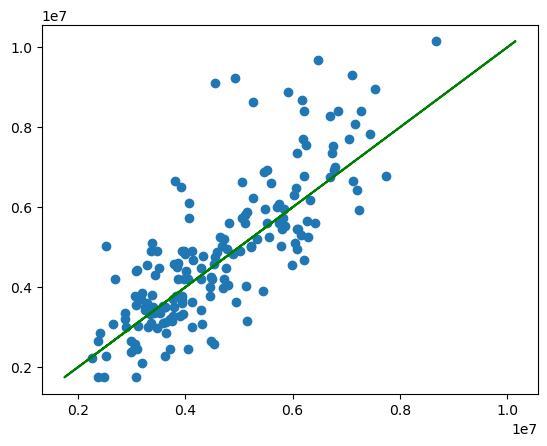

In [89]:
plt.plot(y_test,y_test,"g")
plt.scatter(y_pred,y_test)

In [90]:
mean_absolute_error(y_test,y_pred)

806281.7755801155